In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [311]:
data_train = pd.read_csv('data/train.csv')
# data_test = pd.read_csv('data/test.csv', index_col='id')
data_train.shape

(2000, 21)

In [312]:
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [313]:
# target variable
target = 'price_range'
y = data_train[target]
# y_test = data_test[target]

x = data_train.drop(target, axis = 1)
# x_test = data_test.drop(target, axis = 1)
x.shape

(2000, 20)

In [314]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [315]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
836,902,1,0.6,1,0,0,63,0.7,122,5,14,364,1360,3654,18,8,15,0,1,1
575,1197,1,0.5,1,9,0,20,0.1,129,5,10,214,1710,2885,19,7,14,1,1,1
557,1519,0,2.1,0,0,0,32,0.7,200,1,10,168,1239,2912,11,10,15,1,1,0
1235,1971,1,0.5,1,0,0,40,0.3,186,7,19,485,922,571,8,7,17,1,1,0
1360,882,0,0.7,1,9,1,28,0.2,151,6,16,248,884,751,19,11,8,1,0,1


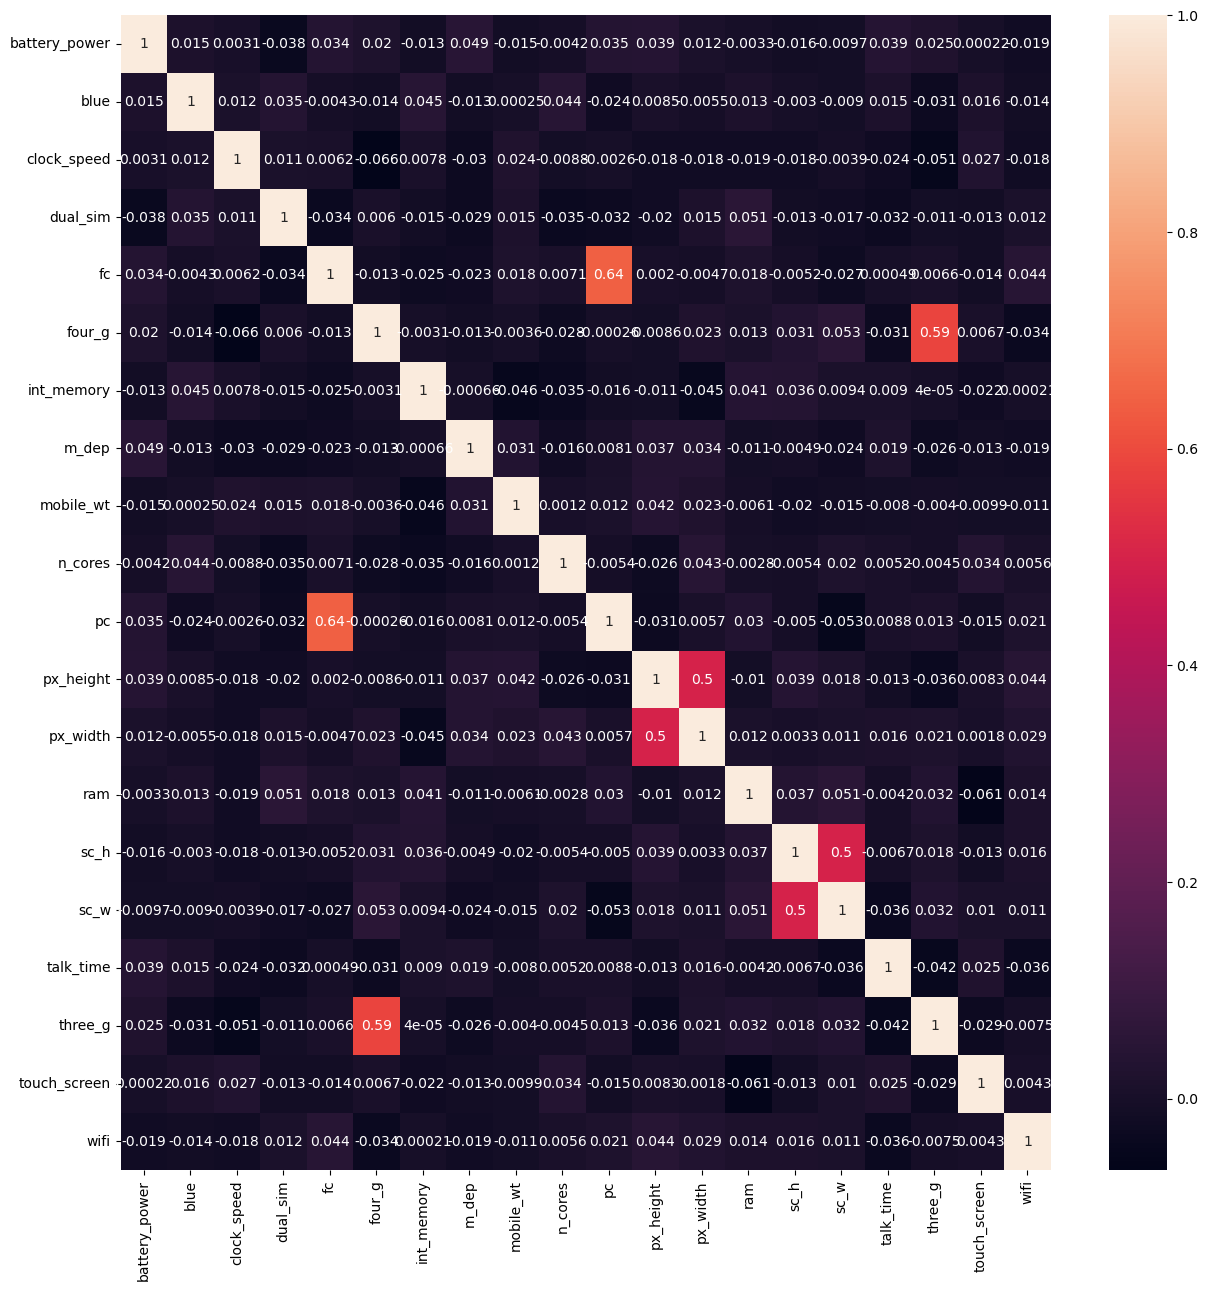

In [316]:
plt.figure(figsize=(12, 12))
corr = x_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [317]:
def correlation(dataset, threshold):
  corr_col = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) >= threshold:
        col_name = corr_matrix.columns[i]
        corr_col.add(col_name)
  return corr_col

In [318]:
corr_feature = correlation(x_train, 0.45)
print(corr_feature)

{'three_g', 'pc', 'sc_w', 'px_width'}


In [319]:
x_train_noncorr = x_train.drop(corr_feature, axis=1)
x_test_noncorr = x_test.drop(corr_feature, axis=1)

x_train_noncorr.shape, x_test_noncorr.shape

((1400, 16), (600, 16))

In [320]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB_noncorr = GaussianNB()
GNB.fit(x_train, y_train)
GNB_noncorr.fit(x_train_noncorr, y_train)

GaussianNB()

[]

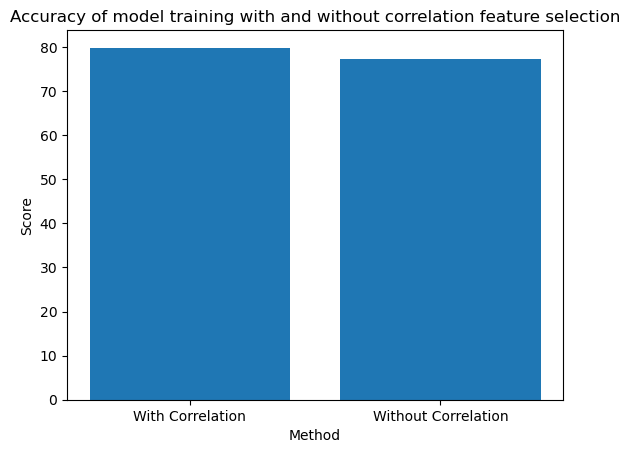

In [321]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve

y_predict = GNB.predict(x_test)
y_noncorr_predict = GNB_noncorr.predict(x_test_noncorr)

# accuracy_score(y_test, y_predict)*100
# accuracy_score(y_test, y_noncorr_predict)*100
result = {'With Correlation': accuracy_score(y_test, y_predict)*100,
          'Without Correlation': accuracy_score(y_test, y_noncorr_predict)*100}
methods = list(result.keys())
scores = list(result.values())
plt.bar(methods, scores)
plt.title('Accuracy of model training with and without correlation feature selection')
plt.xlabel('Method')
plt.ylabel('Score')
plt.plot()

In [322]:
print('Confusion matrix of trained models')
print('With correlation feature selection')
print(confusion_matrix(y_test, y_predict))
print('Without correlation feature selection')
print(confusion_matrix(y_test, y_noncorr_predict))

Confusion matrix of trained models
With correlation feature selection
[[137  14   0   0]
 [ 13 107  26   0]
 [  0  25 106  17]
 [  0   0  26 129]]
Without correlation feature selection
[[133  18   0   0]
 [ 18 102  26   0]
 [  0  25 100  23]
 [  0   0  27 128]]


In [323]:
print(classification_report(y_test, y_predict))
print(classification_report(y_test, y_noncorr_predict))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       151
           1       0.73      0.73      0.73       146
           2       0.67      0.72      0.69       148
           3       0.88      0.83      0.86       155

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       151
           1       0.70      0.70      0.70       146
           2       0.65      0.68      0.66       148
           3       0.85      0.83      0.84       155

    accuracy                           0.77       600
   macro avg       0.77      0.77      0.77       600
weighted avg       0.77      0.77      0.77       600

